# 1. Central Limit Theorem

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
delivery = pd.read_csv('deliveries.csv')
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [7]:
#All batsmen who have palyed in IPL
runs = delivery.groupby('batsman').sum()['batsman_runs']

In [4]:
runs

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [5]:
runs = runs.values

C:\Users\hd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

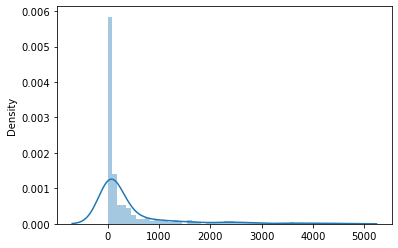

In [6]:
sns.distplot(runs)

In [8]:
# n=50, batsmen taken per sample
# m=1000, number of times sampling done

In [9]:
np.random.choice(runs, size=5)

array([ 32,  15, 137, 187, 798], dtype=int64)

In [10]:
m=1000
n=50

new=[]

for i in range(m):
    x=np.random.choice(runs, size=n)
    new.append(x.mean())

In [13]:
len(new)

1000

In [14]:
new = np.array(new)

In [15]:
new

array([626.9 , 603.06, 417.  , 432.34, 395.26, 192.78, 572.08, 349.82,
       366.62, 435.58, 393.86, 360.62, 558.9 , 346.06, 420.38, 304.1 ,
       348.3 , 309.74, 252.56, 417.64, 424.9 , 438.14, 360.86, 470.1 ,
       378.86, 286.28, 497.14, 426.88, 370.14, 479.96, 294.84, 418.14,
       282.4 , 272.32, 485.46, 315.26, 385.66, 441.2 , 549.56, 507.6 ,
       381.18, 313.5 , 263.08, 406.58, 335.12, 336.26, 357.18, 305.72,
       353.18, 319.32, 351.68, 356.16, 453.46, 444.92, 447.74, 772.54,
       614.92, 334.1 , 637.96, 507.98, 399.88, 241.24, 332.46, 508.1 ,
       391.2 , 458.94, 424.58, 276.58, 599.76, 385.  , 409.  , 363.74,
       431.78, 308.44, 280.98, 206.92, 472.8 , 371.22, 262.82, 518.26,
       250.06, 419.82, 478.62, 371.48, 397.06, 421.68, 392.16, 502.8 ,
       483.9 , 161.14, 482.64, 713.62, 344.88, 743.22, 522.26, 495.04,
       443.8 , 316.76, 442.04, 402.62, 422.22, 489.92, 422.42, 311.6 ,
       372.82, 370.88, 455.54, 407.18, 640.3 , 354.96, 320.12, 394.46,
      

C:\Users\hd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

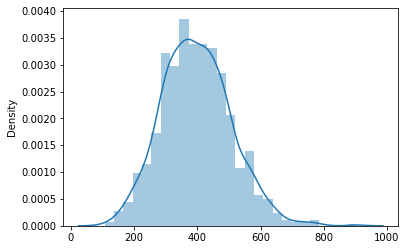

In [20]:
sns.distplot(new)

In [21]:
runs.mean()

398.9783080260304

In [22]:
new.mean()

397.70042

In [23]:
runs.var()/50

12338.425381873067

In [25]:
new.var()

11926.7697946236

In [28]:
runs.std()/7.2

109.08935531909707

In [26]:
new.std()

109.20975137149429